# Boxplots with separate y-axis


## Introduction
You will often encounter datasets where columns have significantly different scales. 

That can cause problems when we draw  boxplot for the dataset. The column with the larger scale is going to essentially suppress other columns. 

## Dataset

Let's see an example. We'll use the [Taiwan real estate dataset](https://github.com/ysk125103/datascience101/tree/main/datasets/taiwan_real_estate):

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams.update({'font.size': 14})

In [2]:
datafile = 'https://raw.githubusercontent.com/ysk125103/datascience101/main/datasets/taiwan_real_estate/taiwan_real_estate_partial.csv' 
data_df = pd.read_csv(datafile)

In [3]:
data_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,age,station_distance,stores_count,unit_price
min,0.00,49.66,0.00,12.20
max,43.80,6396.28,10.00,78.00
mean,19.36,1084.08,4.16,38.16
std,11.87,1365.53,2.80,13.59


The column `station_distance` clearly has a much larger scale than other columns. It's maximum value is over 6000. All other columns stay under 100. 

## The Problem

Let's try pandas' default boxplot method: 

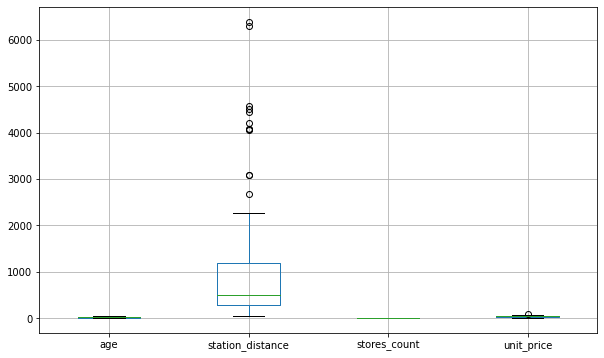

In [4]:
plt.figure(figsize=(10, 6))
data_df.boxplot()
plt.show()

We can only see the details of the column `station_distance`. Other columns are squeezed into the bottom of the plot. 

Seaborn's default `boxplot()` has the same issue:

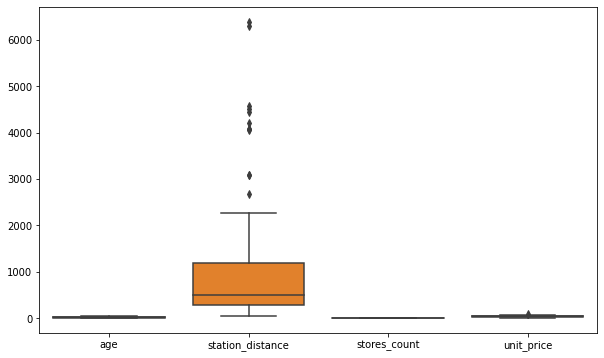

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df)
plt.show()

## The Solution

Ideally we want to draw the boxplot so that columns have different y-axis. That way, they won't affect each other visually.

There are a few ways to do that:

### 1. Pandas `plot()` method: 

Use pandas `plot()` with `kind` and `subplots` parameters like below. 

Most importantly, set `sharey=False` so that each boxplot has it's own yaxis: 

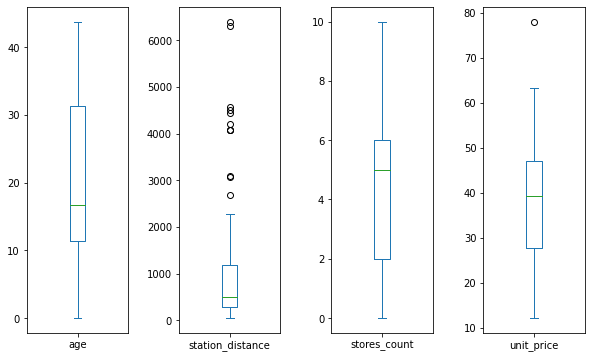

In [6]:
data_df.plot(kind='box', subplots=True, sharey=False, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5) # increase spacing between subplots
plt.show()

In [7]:
# I expected below to work but it didn't:
# data_df.boxplot(subplots=True, sharey=False, figsize=(12, 8))

### 2. Use matplotlib's `subplots()` method:

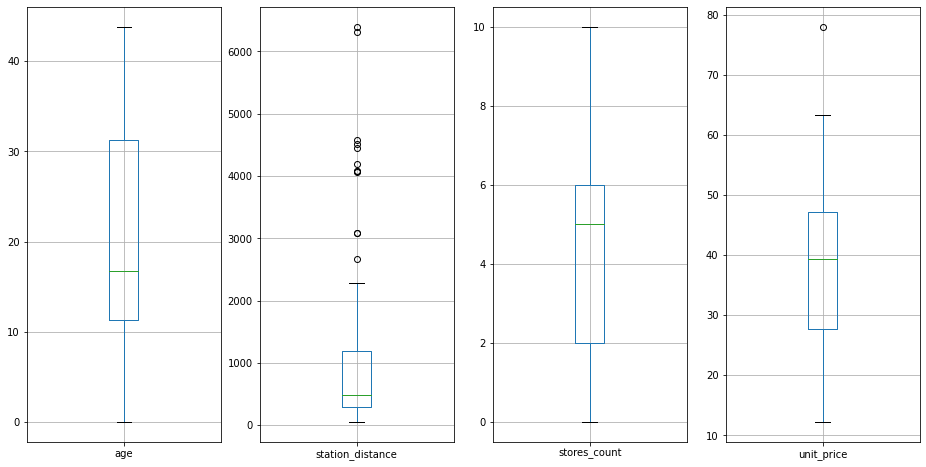

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(16, 8))

data_df.boxplot('age', ax=ax[0])
data_df.boxplot('station_distance', ax=ax[1])
data_df.boxplot('stores_count', ax=ax[2])
data_df.boxplot('unit_price', ax=ax[3])

plt.show()

If you fancy seaborn's styles, use it for each subplot like below.

It's a little bit more work though. And it adds a funky '0' on the x-axis of each plot. If you find a way to remove it, let me know!

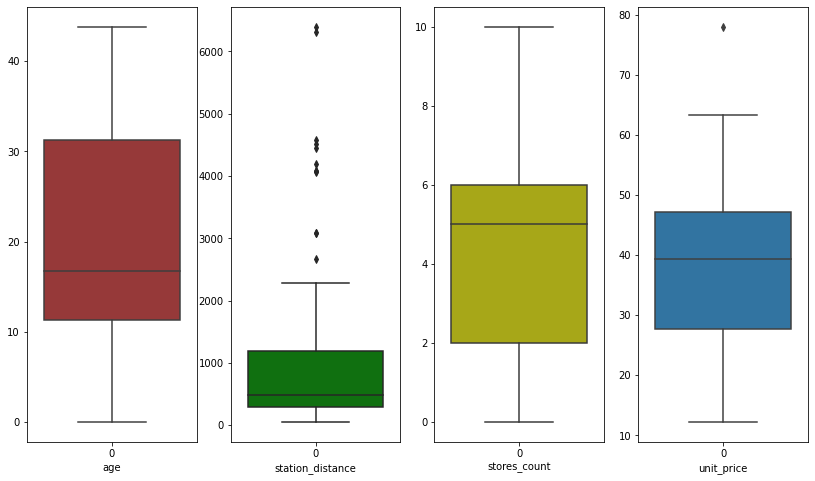

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(14, 8))

sns.boxplot(data=data_df['age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('age')

sns.boxplot(data=data_df['station_distance'], ax=ax[1], color='g')
ax[1].set_xlabel('station_distance')

sns.boxplot(data=data_df['stores_count'], ax=ax[2], color='y')
ax[2].set_xlabel('stores_count')

sns.boxplot(data=data_df['unit_price'], ax=ax[3])
ax[3].set_xlabel('unit_price')

plt.show()

---------------

Check out my Machine Learning blog at https://YashmeetSingh.com